In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import os

import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA

# librosa
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [2]:
general_path = 'gtzan-dataset-music-genre-classification/Data'
genres = os.listdir(f'{general_path}/genres_original/')
print("Genres available in the dataset:", genres)

Genres available in the dataset: ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [3]:
y, sr = librosa.load(f'{general_path}/genres_original/reggae/reggae.00036.wav')

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

print('Check Len of Audio:', 661794 / 22050)

audio_file, _ = librosa.effects.trim(y)

print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

y: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

y shape: (661794,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332
Audio File: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

Audio File shape: (661794,)


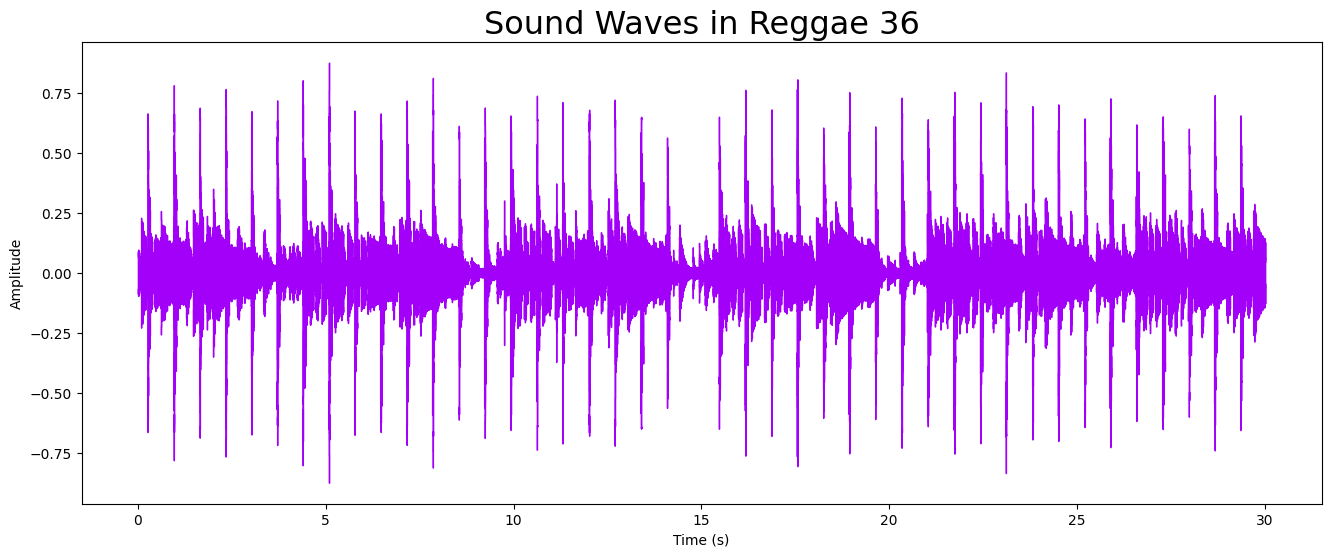

In [4]:
# Plot the waveform of the audio file
plt.figure(figsize=(16, 6))
librosa.display.waveshow(audio_file, sr=sr, color="#A300F9")
plt.title("Sound Waves in Reggae 36", fontsize=23)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [5]:
# Short-time Fourier transform (STFT) parameters
n_fft = 2048  # Number of samples in each FFT window
hop_length = 512  # Number of samples between successive frames

# Compute the Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft=n_fft, hop_length=hop_length))

# Print the shape of the STFT matrix
print('Shape of D object (STFT matrix):', np.shape(D))

Shape of D object (STFT matrix): (1025, 1293)


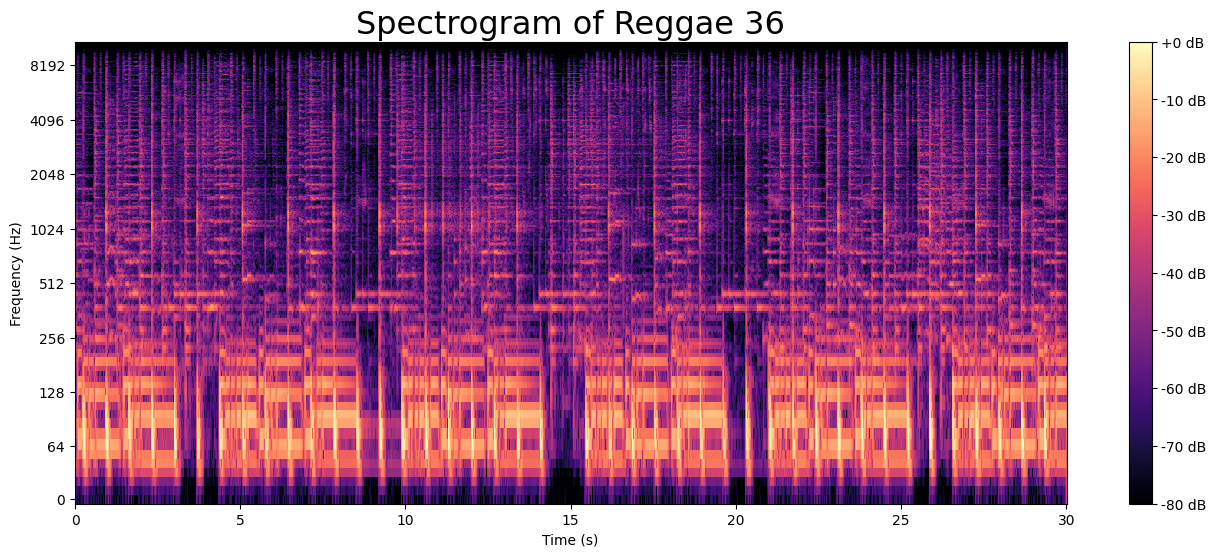

In [6]:
# Visualize the STFT as a spectrogram
plt.figure(figsize=(16, 6))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='log', cmap='magma')
plt.title("Spectrogram of Reggae 36", fontsize=23)
plt.colorbar(format="%+2.0f dB")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

In [7]:
# General configurations
hop_length = 512  # Default hop length; adjust as needed
cmap = 'cool'     # Default colormap for spectrograms

In [8]:
# Function that normalizes the data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

In [9]:
# Define a list of dictionaries containing file paths and titles
file_paths = []
for genre in genres:
    genre_folder = os.path.join(general_path, "genres_original", genre)
    files = os.listdir(genre_folder)
    
    for file in files:
        file_paths.append({
            'path': os.path.join(genre_folder, file),
            'title': f"{genre} - {file}"
        })


In [10]:
# Function to load and trim audio
def load_and_trim_audio(file_path):
    y, sr = librosa.load(file_path)
    y_trimmed, _ = librosa.effects.trim(y)  # Remove leading and trailing silence
    return y_trimmed, sr

In [11]:
# Limit the number of generated images
image_count = 0  
max_images = 10  

# Iterate over the audio files and analyze them
for file_info in file_paths:
    if image_count >= max_images:
        break  # Stop once 10 images are generated

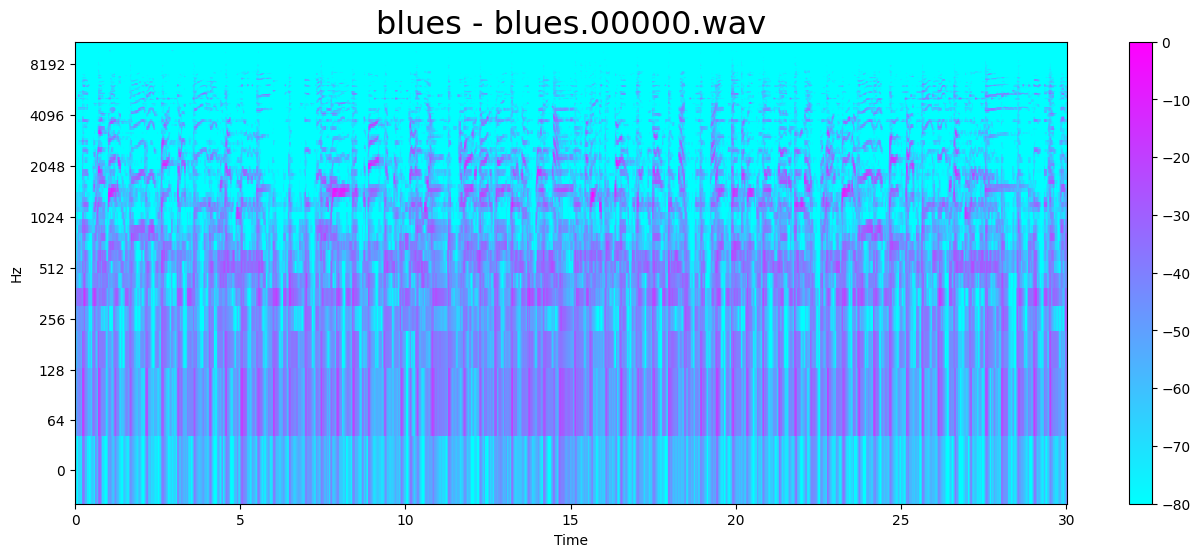

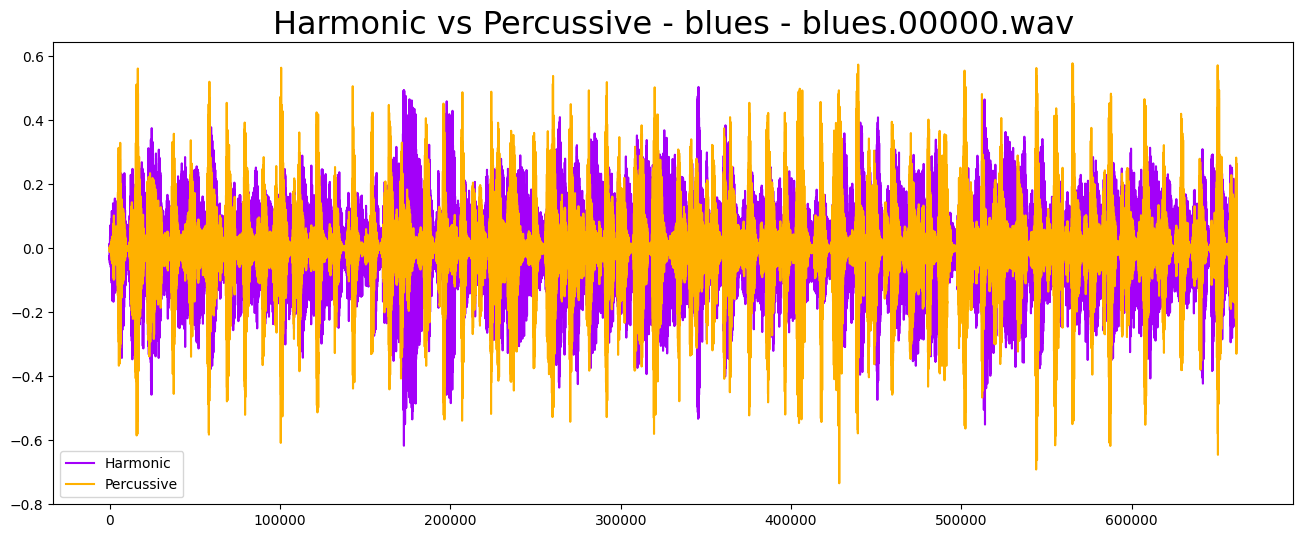

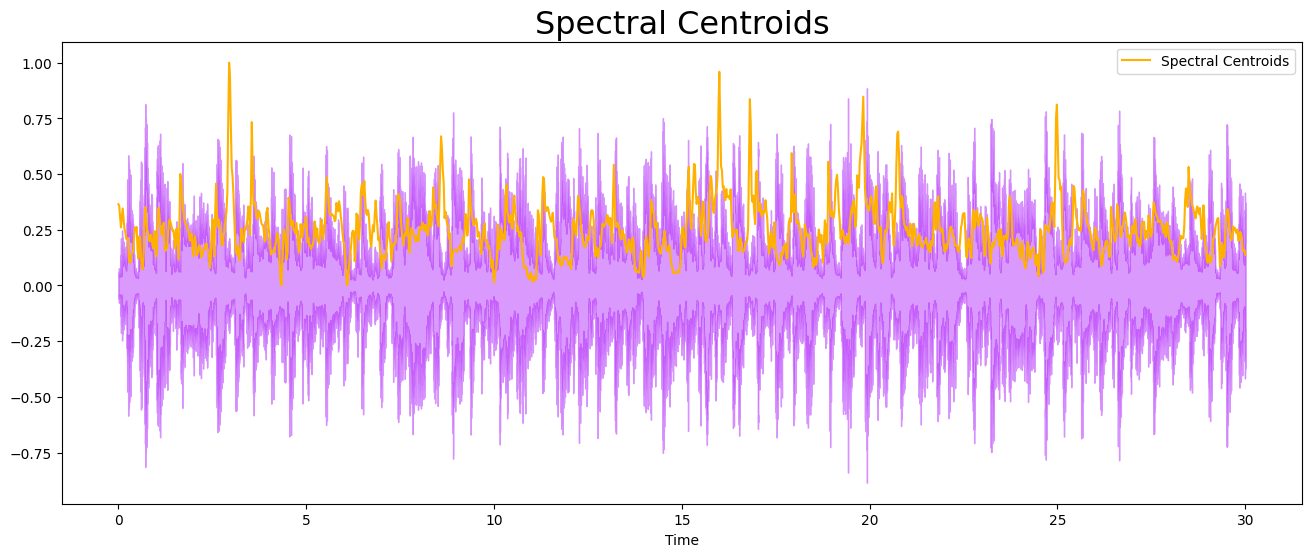

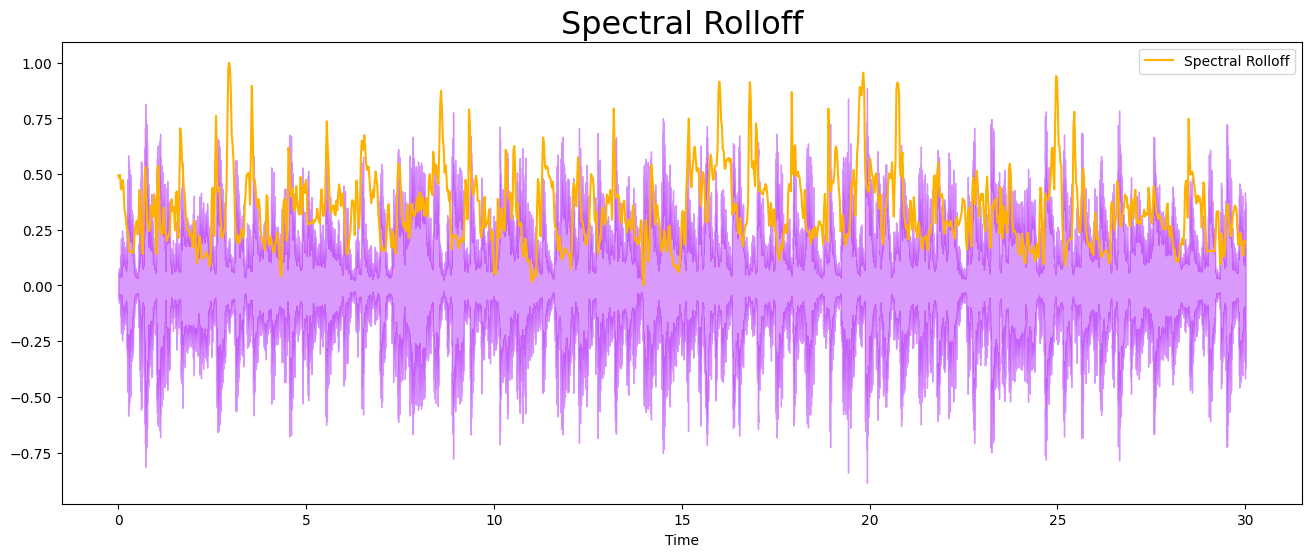

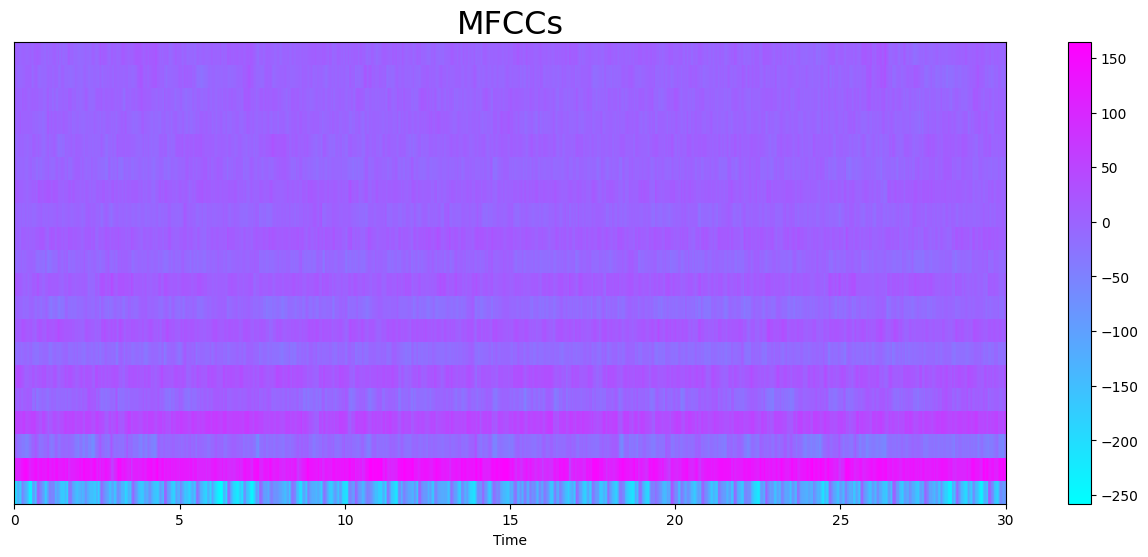

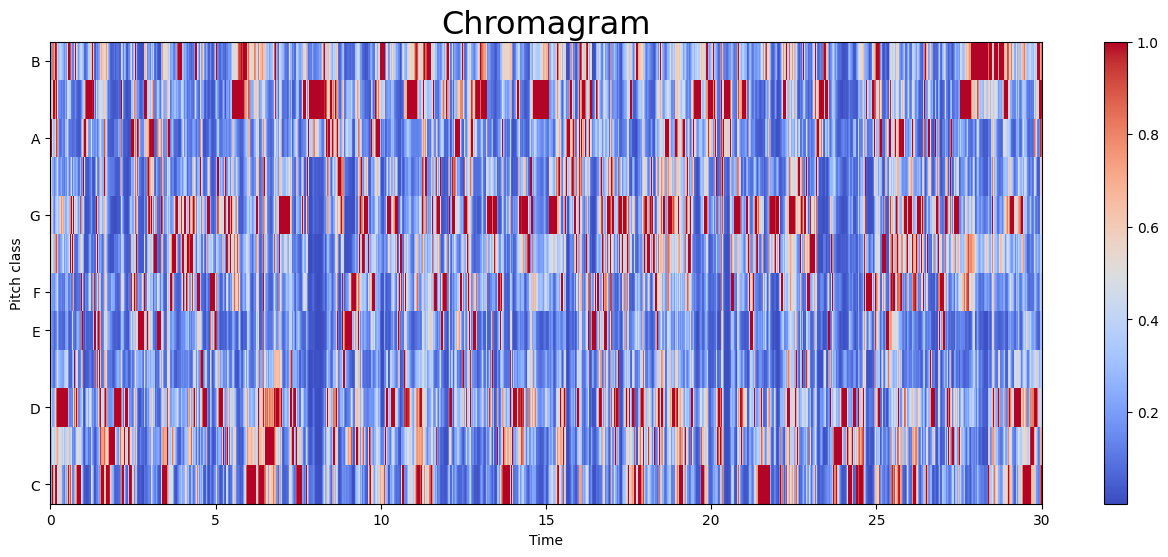

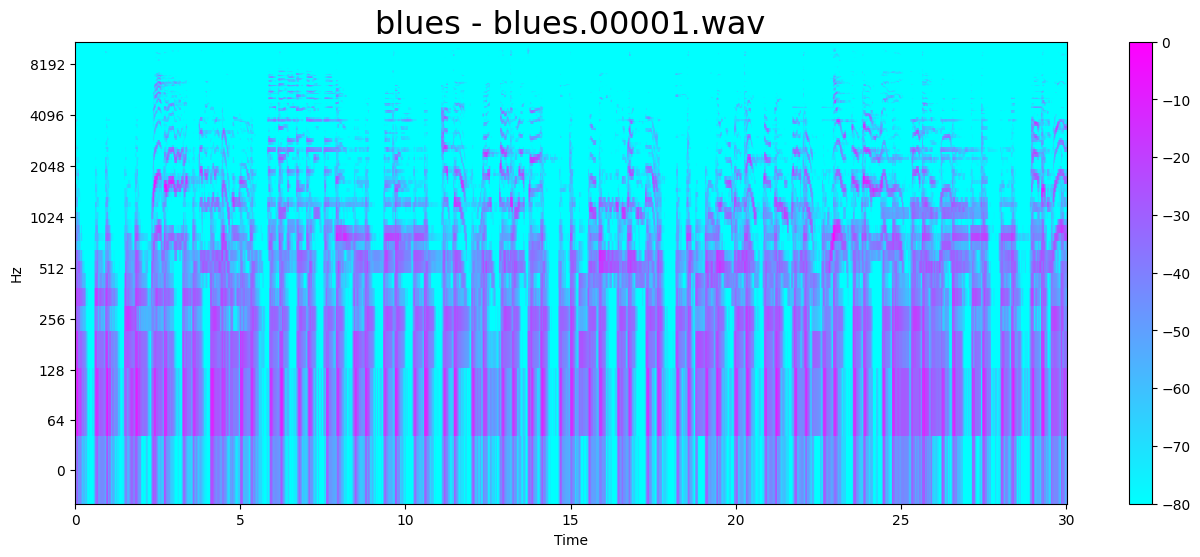

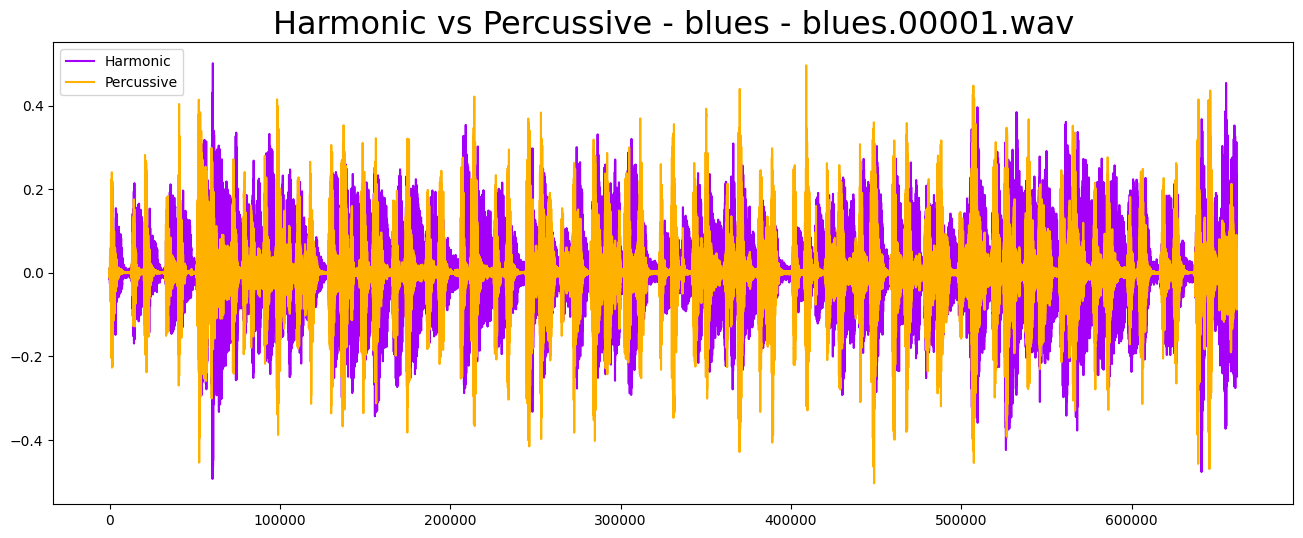

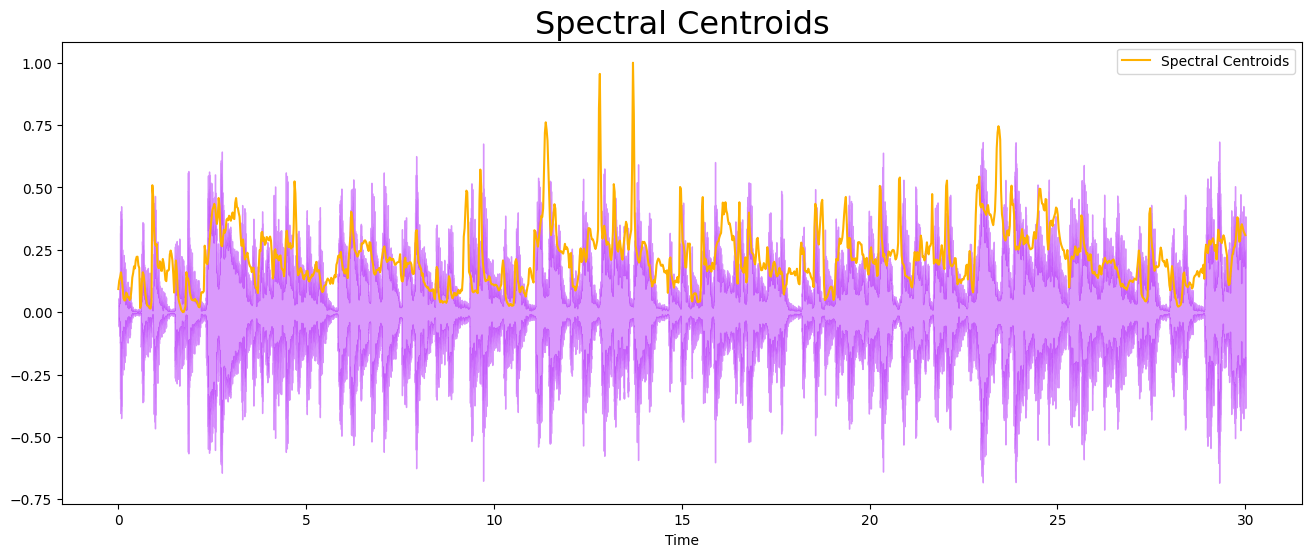

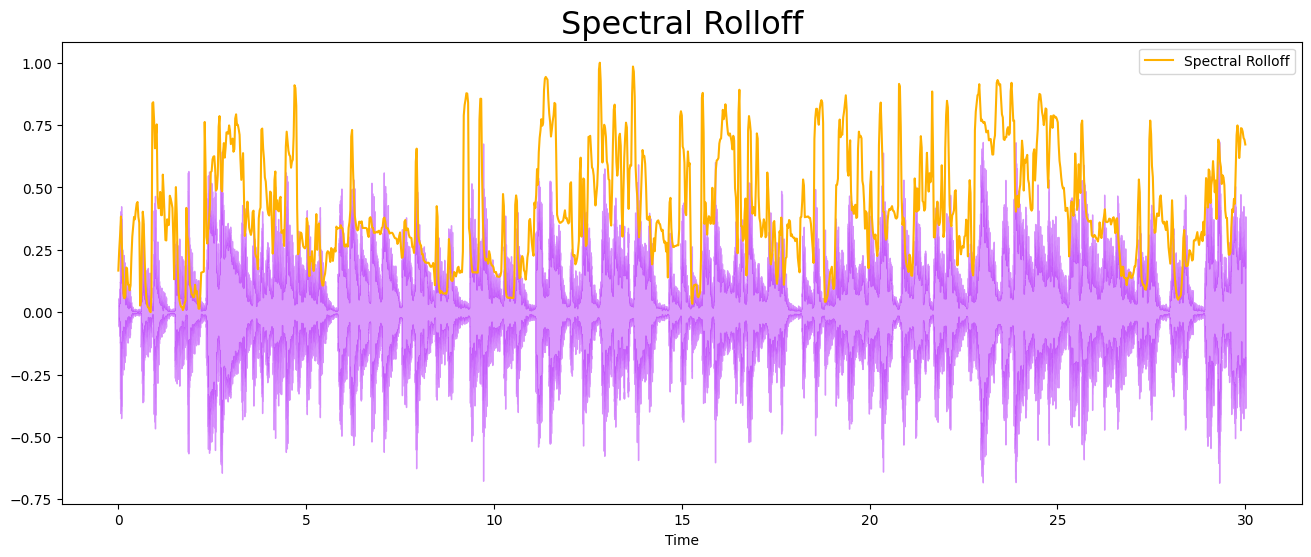

In [12]:
# Iterate over the audio files and analyze them
for file_info in file_paths:
    if image_count >= max_images:
        break  # Stop once 10 images are generated

    # Load and trim the audio
    y, sr = load_and_trim_audio(file_info['path'])
    
    # Plot Mel spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    DB = librosa.amplitude_to_db(S, ref=np.max)
    
    plt.figure(figsize=(16, 6))
    librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', cmap=cmap)
    plt.colorbar()
    plt.title(file_info['title'], fontsize=23)
    plt.show()
    image_count += 1  # Increment image counter
    
    if image_count >= max_images:
        break  # Stop once 10 images are generated

    # Harmonic vs Percussive Separation
    y_harm, y_perc = librosa.effects.hpss(y)
    plt.figure(figsize=(16, 6))
    plt.plot(y_harm, color='#A300F9', label='Harmonic')
    plt.plot(y_perc, color='#FFB100', label='Percussive')
    plt.title(f"Harmonic vs Percussive - {file_info['title']}", fontsize=23)
    plt.legend()
    plt.show()
    image_count += 1  

    if image_count >= max_images:
        break  

    # Spectral Centroid
    spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    
    plt.figure(figsize=(16, 6))
    librosa.display.waveshow(y, sr=sr, alpha=0.4, color='#A300F9')
    plt.plot(t, normalize(spectral_centroids), color='#FFB100', label='Spectral Centroids')
    plt.title("Spectral Centroids", fontsize=23)
    plt.legend()
    plt.show()
    image_count += 1  

    if image_count >= max_images:
        break  

    # Spectral Rolloff
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]
    plt.figure(figsize=(16, 6))
    librosa.display.waveshow(y, sr=sr, alpha=0.4, color='#A300F9')
    plt.plot(t, normalize(spectral_rolloff), color='#FFB100', label='Spectral Rolloff')
    plt.title("Spectral Rolloff", fontsize=23)
    plt.legend()
    plt.show()
    image_count += 1  

    if image_count >= max_images:
        break  

    # MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    plt.figure(figsize=(16, 6))
    librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap=cmap)
    plt.colorbar()
    plt.title("MFCCs", fontsize=23)
    plt.show()
    image_count += 1  

    if image_count >= max_images:
        break  

    # Chromagram
    chromagram = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=hop_length)
    plt.figure(figsize=(16, 6))
    librosa.display.specshow(chromagram, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
    plt.colorbar()
    plt.title("Chromagram", fontsize=23)
    plt.show()
    image_count += 1  

    if image_count >= max_images:
        break  

In [13]:
# Load the dataset
data = pd.read_csv(f'{general_path}/features_30_sec.csv')
print(data.head())

          filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516        

In [14]:
### Correlation Matrix ###
# Select columns containing 'mean' for correlation analysis
mean_cols = [col for col in data.columns if 'mean' in col]
corr = data[mean_cols].corr()

In [15]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

In [16]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 11))

<Figure size 1600x1100 with 0 Axes>

<Figure size 1600x1100 with 0 Axes>

In [17]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s=90, l=45, n=5)

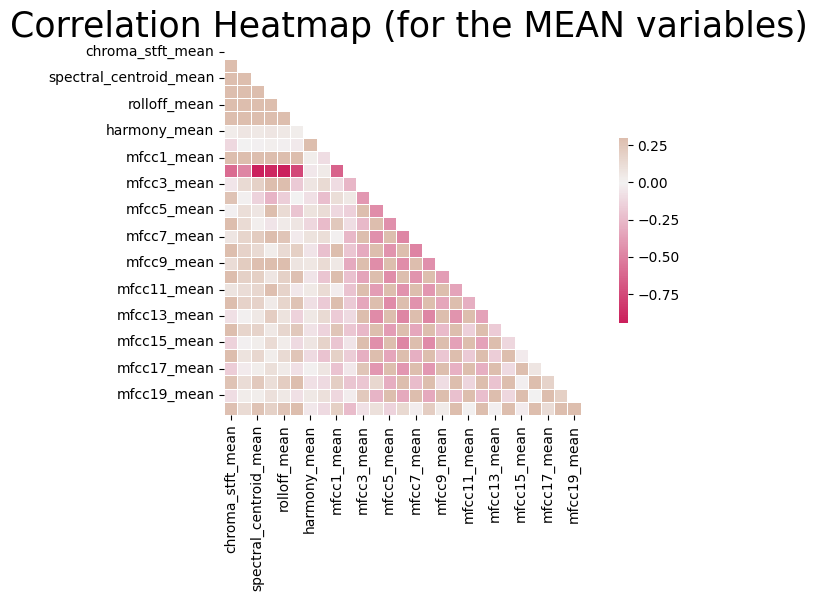

In [18]:
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap (for the MEAN variables)', fontsize=25)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig("Corr_Heatmap.jpg")
plt.show()

In [19]:
### Boxplot: BPM Distribution by Genre ###
# Select relevant columns
tempo_data = data[["label", "tempo"]]

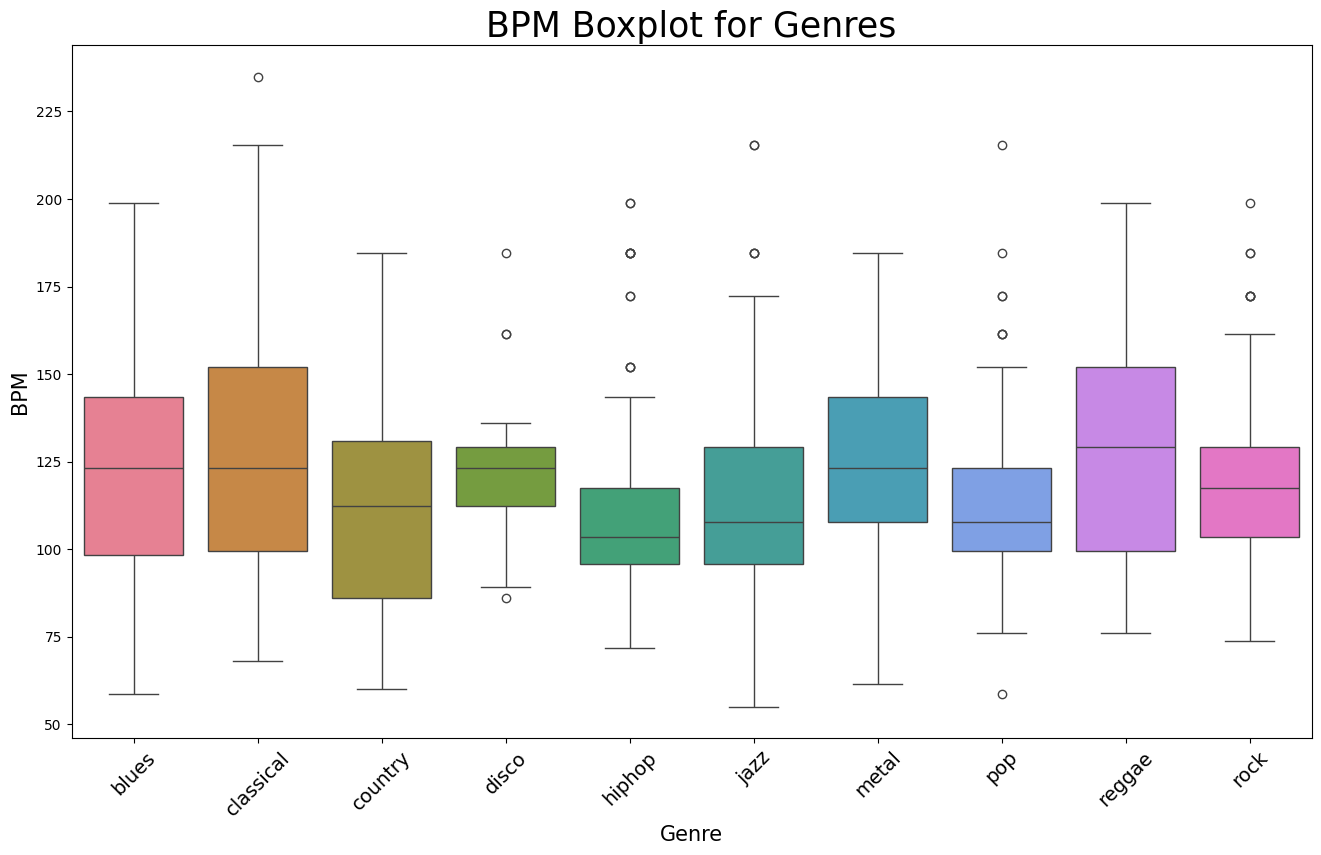

In [20]:
# Create the boxplot
plt.figure(figsize=(16, 9))
sns.boxplot(x="label", y="tempo", data=tempo_data, palette='husl')
plt.title('BPM Boxplot for Genres', fontsize=25)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=10)
plt.xlabel("Genre", fontsize=15)
plt.ylabel("BPM", fontsize=15)
plt.savefig("BPM_Boxplot.jpg")
plt.show()

In [21]:
### Data Preprocessing ###
# Exclude the first column and separate labels
data = data.iloc[:, 1:]  # Adjust slicing if the first column is non-essential
y = data['label']
X = data.drop(columns=['label'])

In [22]:
# Normalize features using MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

In [23]:
### PCA for Dimensionality Reduction ###
# Perform PCA to reduce to 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

In [24]:
# Concatenate with labels
final_df = pd.concat([principal_df, y.reset_index(drop=True)], axis=1)

In [25]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")
print(f"Total Variance Explained: {np.sum(explained_variance) * 100:.2f}%")

Explained Variance Ratio: [0.2439355  0.21781804]
Total Variance Explained: 46.18%


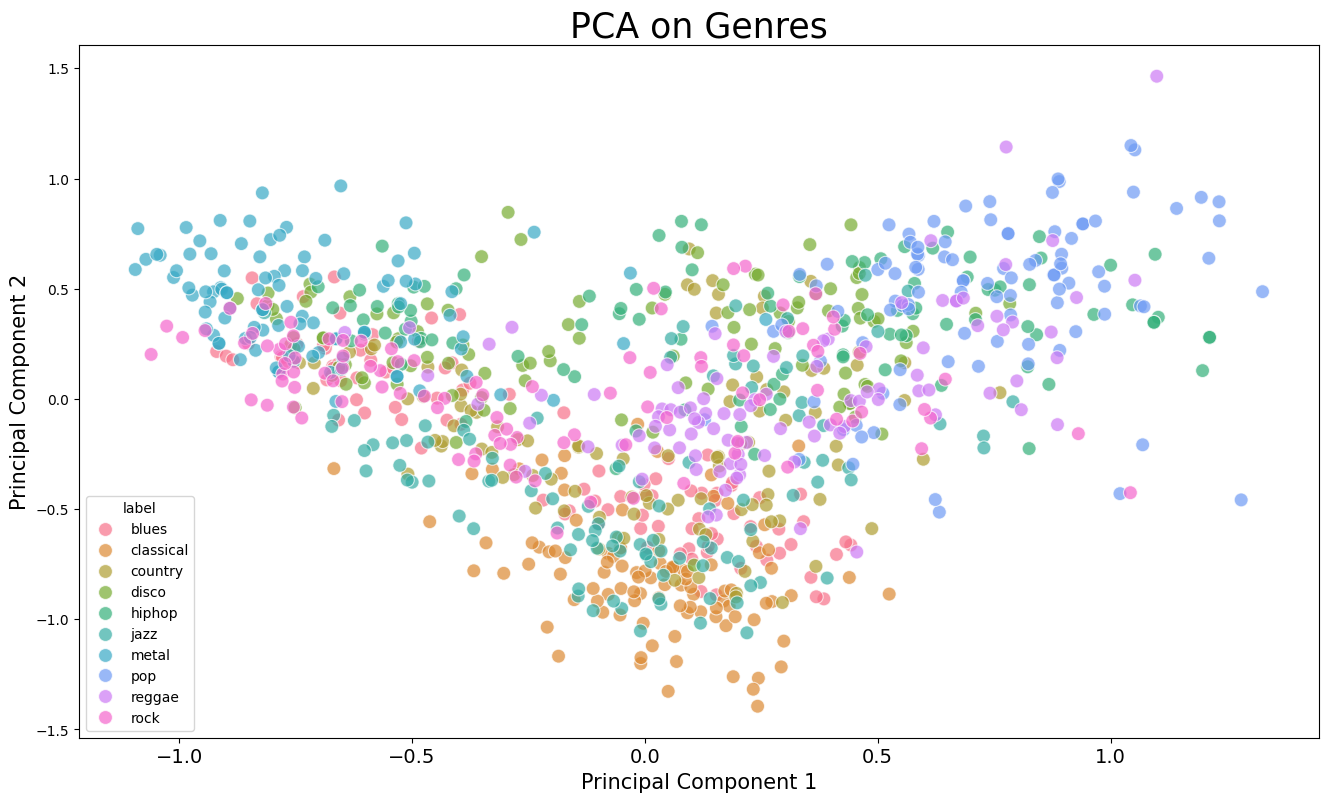

In [26]:
### PCA Scatter Plot ###
plt.figure(figsize=(16, 9))
sns.scatterplot(
    x="Principal Component 1", 
    y="Principal Component 2", 
    data=final_df, 
    hue="label", 
    palette="husl", 
    alpha=0.7, 
    s=100
)
plt.title('PCA on Genres', fontsize=25)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.xlabel("Principal Component 1", fontsize=15)
plt.ylabel("Principal Component 2", fontsize=15)
plt.savefig("PCA_Scatter.jpg")
plt.show()

In [27]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [28]:
# Load data
data = pd.read_csv(f'{general_path}/features_3_sec.csv')
data = data.iloc[:, 1:]  # Drop the first column
y = data['label']  # Genre labels
X = data.drop(columns=['label'])  # Feature columns

In [29]:
# Normalize features
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [30]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
# Model assessment function
def model_assess(model, title="Model", verbose=True):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = round(accuracy_score(y_test, preds), 5)
    if verbose:
        print(f'Accuracy ({title}): {accuracy}\n')
    return accuracy

In [35]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Encode labels as numbers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['label'])  # Encode genres to integers (0–9)

X = data.drop(columns=['label'])

# Normalize X
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
# Initialize models
models = {
    "Naive Bayes": GaussianNB(),
    "Stochastic Gradient Descent": SGDClassifier(max_iter=5000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=19),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=42),
    "Support Vector Machine": SVC(decision_function_shape="ovo", random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial'),
    "Neural Network": MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=42),
    "XGBoost Classifier": XGBClassifier(n_estimators=1000, learning_rate=0.05, random_state=42),
    "XGBoost Random Forest": XGBRFClassifier(objective='multi:softmax', random_state=42),
}

In [37]:
# Evaluate models
for title, model in models.items():
    model_assess(model, title)

Accuracy (Naive Bayes): 0.51952

Accuracy (Stochastic Gradient Descent): 0.66133

Accuracy (KNN): 0.80581

Accuracy (Decision Tree): 0.64965

Accuracy (Random Forest): 0.81081

Accuracy (Support Vector Machine): 0.75409

Accuracy (Logistic Regression): 0.6977

Accuracy (Neural Network): 0.65899

Accuracy (XGBoost Classifier): 0.90123

Accuracy (XGBoost Random Forest): 0.74708



In [38]:
# Train final XGBoost model
final_model = XGBClassifier(n_estimators=1000, learning_rate=0.05, random_state=42)
final_model.fit(X_train, y_train)
final_preds = final_model.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, final_preds)
print(f"Final Model Accuracy: {accuracy:.4f}")

# Classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, final_preds, target_names=label_encoder.classes_))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, final_preds))

Final Model Accuracy: 0.9012

Classification Report:
              precision    recall  f1-score   support

       blues       0.92      0.87      0.89       319
   classical       0.94      0.97      0.95       308
     country       0.81      0.87      0.84       286
       disco       0.86      0.88      0.87       301
      hiphop       0.94      0.90      0.92       311
        jazz       0.89      0.92      0.90       286
       metal       0.94      0.93      0.94       303
         pop       0.90      0.96      0.93       267
      reggae       0.92      0.89      0.91       316
        rock       0.90      0.82      0.86       300

    accuracy                           0.90      2997
   macro avg       0.90      0.90      0.90      2997
weighted avg       0.90      0.90      0.90      2997


Confusion Matrix:
[[277   1  14   9   1   5   4   0   4   4]
 [  0 299   0   0   0   7   0   0   0   2]
 [ 11   1 248   4   0  12   0   4   5   1]
 [  2   3   7 266   1   1   1  13   0   